In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path
from scraper.sampling import read_samples

data_dir = Path('./data')

In [2]:
# Load data
df = read_samples(data_dir)
picks = df.values.tolist()
print(f"Loaded {len(picks)} picks")

Loaded 231 picks


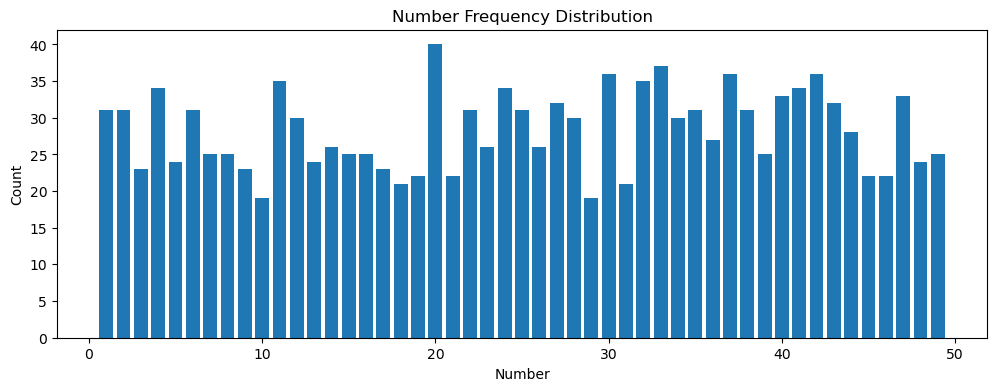

In [18]:
# Calculate overall number frequencies
all_numbers = [num for pick in picks for num in pick]
freq = Counter(all_numbers)

#print("\n--- Frequency of Numbers ---")
#print(pd.Series(freq).sort_index())

plt.figure(figsize=(12, 4))
plt.bar(freq.keys(), freq.values())
plt.title("Number Frequency Distribution")
plt.xlabel("Number")
plt.ylabel("Count")
plt.show()

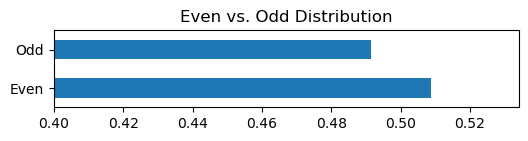

In [59]:
# Even/Odd Analysis
even_odd = pd.Series(all_numbers).apply(lambda x: 'Even' if x % 2 == 0 else 'Odd').value_counts(normalize=True)

#print("\n--- Even/Odd Distribution ---")
#print(even_odd)

plt.figure(figsize=(6, 1))
even_odd.plot(kind='barh', title="Even vs. Odd Distribution")
plt.xlim(left=0.4)
plt.show()

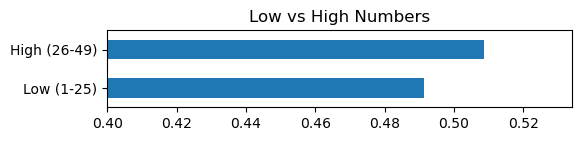

In [60]:
# High/Low Analysis (assuming 1-49 range)
high_low = pd.cut(all_numbers, bins=[0, 25, 49], labels=['Low (1-25)', 'High (26-49)']).value_counts() / len(all_numbers)

#print("\n--- High/Low Distribution ---")
#print(high_low)

plt.figure(figsize=(6, 1))
high_low.plot(kind='barh', title="Low vs High Numbers")
plt.xlim(left=0.4)
plt.show()

--- Consecutive Numbers inside Picks ---
0    120
1     82
2     27
3      2
Name: count, dtype: int64


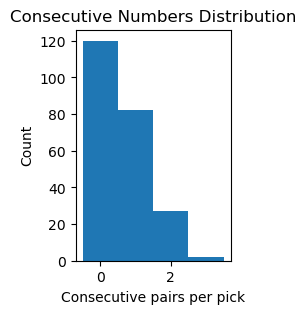

In [35]:
# Consecutive Numbers Analysis
consec_counts = []
for pick in picks:
    sorted_pick = sorted(pick)
    consec = sum(1 for a, b in zip(sorted_pick, sorted_pick[1:]) if b - a == 1)
    consec_counts.append(consec)

print("--- Consecutive Numbers inside Picks ---")
print(pd.Series(consec_counts).value_counts().sort_index())

plt.figure(figsize=(2,3))
plt.hist(consec_counts, bins=range(0, max(consec_counts)+2), align='left')
plt.title("Consecutive Numbers Distribution")
plt.xlabel("Consecutive pairs per pick")
plt.ylabel("Count")
plt.show()


--- Average Gaps Between Numbers ---
count    231.000000
mean       7.043290
std        1.441327
min        2.400000
25%        6.200000
50%        7.200000
75%        8.200000
max        9.600000
dtype: float64


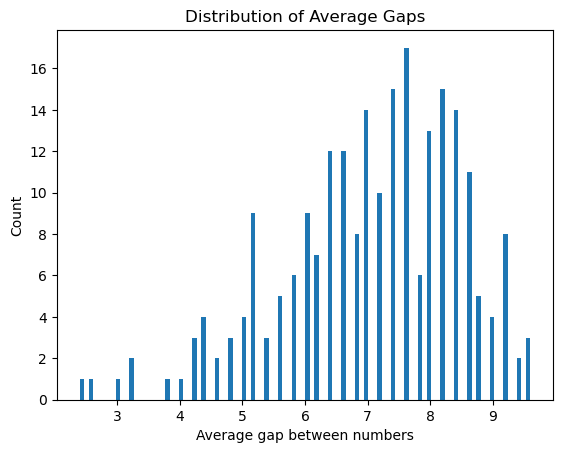

In [70]:
# Gap Analysis
avg_gaps = []
for pick in picks:
    sorted_pick = sorted(pick)
    gaps = np.diff(sorted_pick)
    avg_gaps.append(np.mean(gaps))

print("\n--- Average Gaps Between Numbers ---")
print(pd.Series(avg_gaps).describe())

plt.hist(avg_gaps, bins=100)
plt.title("Distribution of Average Gaps")
plt.xlabel("Average gap between numbers")
plt.ylabel("Count")
plt.show()

### Statistical tests

#### Chi-Square Goodness-of-Fit Test

In [ ]:
# Test if numbers are uniformly distributed:

from scipy.stats import chisquare

observed = pd.Series(all_numbers).value_counts().sort_index()
expected = np.full(49, len(all_numbers)/49)  # Uniform expectation
chi2, p = chisquare(observed, expected)

print(f"p-value: {p:.4f}")  # if p > 0.05 → cannot reject uniformity

p-value: 0.4553


#### Gap Distribution Test

In [ ]:
# Check if gaps follow exponential distribution (true randomness):

from scipy.stats import kstest

all_gaps = np.concatenate([np.diff(sorted(pick)) for pick in picks])
_, p_gaps = kstest(all_gaps, 'expon', args=(0, np.mean(all_gaps)))

print(f"Gap distribution p-value: {p_gaps:.4f}")

Gap distribution p-value: 0.0000


In [65]:
# discrete uniform gap test:

from scipy.stats import ks_2samp

# Expected gap distribution for 6/49 lotto (theoretical)
expected_gaps = np.random.randint(1, 49, size=100000)  # Simulated gaps
_, p_gaps_uniform = ks_2samp(all_gaps, expected_gaps)
print(f"Uniform gap p-value: {p_gaps_uniform:.4f}")

Uniform gap p-value: 0.0000


Text(0.5, 1.0, 'Gap Distribution vs. True Randomness')

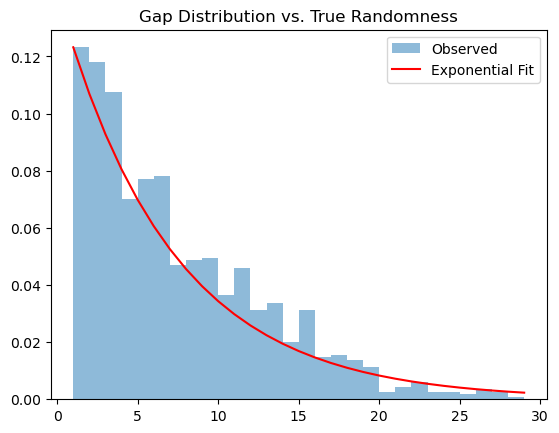

In [67]:
from scipy.stats import expon

plt.hist(all_gaps, bins=range(1, 30), density=True, alpha=0.5, label="Observed")
plt.plot(range(1, 30), expon(scale=np.mean(all_gaps)).pdf(range(1, 30)), 'r-', label="Exponential Fit")
plt.legend()
plt.title("Gap Distribution vs. True Randomness")

### Conclusion

Nothing out of the ordinary.